In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [7]:
data = pd.read_csv(r'C:\Users\nikhi\Data Scientist Projects\Gold_data.csv')
print(data.head())
print('\n Data Types:')
print(data.dtypes)

         date    price
0  01-01-2016  2252.60
1  02-01-2016  2454.50
2  03-01-2016  2708.10
3  04-01-2016  2577.80
4  05-01-2016  2597.75

 Data Types:
date      object
price    float64
dtype: object


In [8]:
import warnings
  
# adding entry into the specifications
# of the warnings filter.
warnings.filterwarnings('ignore', '.*do not.*', )

from datetime import datetime
con=data['date']
data['date']=pd.to_datetime(data['date'])
data.set_index('date', inplace=True)
#check datatype of index
data.index

<ipython-input-8-e3930cc0a46c>:9: UserWarning: Parsing '13-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['date']=pd.to_datetime(data['date'])
<ipython-input-8-e3930cc0a46c>:9: UserWarning: Parsing '14-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['date']=pd.to_datetime(data['date'])
<ipython-input-8-e3930cc0a46c>:9: UserWarning: Parsing '15-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['date']=pd.to_datetime(data['date'])
<ipython-input-8-e3930cc0a46c>:9: UserWarning: Parsing '16-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['date']=pd.to_datetime(data['date'])
<ipython-input-8-e3930cc0a46c>:9: UserWarning: Parsing '17-01-2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consisten

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01',
               ...
               '2021-12-12', '2021-12-13', '2021-12-14', '2021-12-15',
               '2021-12-16', '2021-12-17', '2021-12-18', '2021-12-19',
               '2021-12-20', '2021-12-21'],
              dtype='datetime64[ns]', name='date', length=2182, freq=None)

In [10]:
#convert to time series:
ts = data['price']
ts.head(10)

date
2016-01-01    2252.60
2016-02-01    2454.50
2016-03-01    2708.10
2016-04-01    2577.80
2016-05-01    2597.75
2016-06-01    2617.70
2016-07-01    2903.80
2016-08-01    2887.80
2016-09-01    2813.80
2016-10-01    2786.80
Name: price, dtype: float64

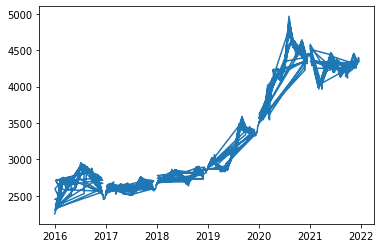

In [12]:
plt.plot(ts)
plt.show()

In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    """
    Dickey fuller Test.
    ------------------------------------------------
    Parameters : Timeseries Data
    ------------------------------------------------
    
    Returns : 
    ------------------------------------------------
    mean
    Standard deviation (instead of variance)
    Plot original series
    Plot mean
    Plot std
    Plot Dickey-Fuller test
    """
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    
    # Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

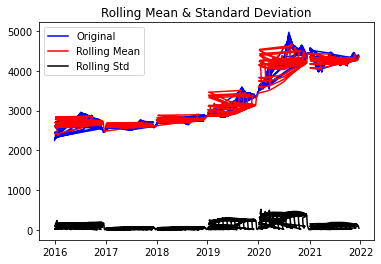

Results of Dickey-Fuller Test:
Test Statistic                   -0.309904
p-value                           0.924090
#Lags Used                       26.000000
Number of Observations Used    2155.000000
Critical Value (1%)              -3.433388
Critical Value (5%)              -2.862882
Critical Value (10%)             -2.567484
dtype: float64


In [17]:
test_stationarity(ts)

# Trend
The first step is to reduce the trend using transformation, as we can see here that there is a strong positive trend. These transformation can be log, sq-rt, cube root etc

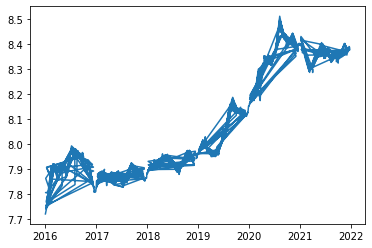

In [18]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

### Smoothing:
In smoothing we usually take the past few instances (rolling estimates) We will discuss two methods under smoothing- Moving average and Exponentially weighted moving average

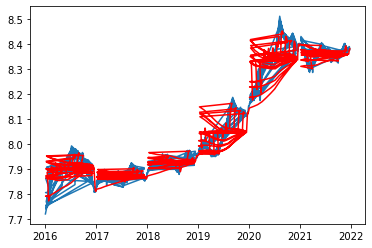

In [19]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

### Now subtract the rolling mean from the original series.¶ 

In [20]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

date
2016-01-01   NaN
2016-02-01   NaN
2016-03-01   NaN
2016-04-01   NaN
2016-05-01   NaN
Name: price, dtype: float64

In [21]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2016-12-01   -0.039877
2016-01-13   -0.130325
2016-01-14   -0.127601
2016-01-15   -0.101950
2016-01-16   -0.094308
Name: price, dtype: float64

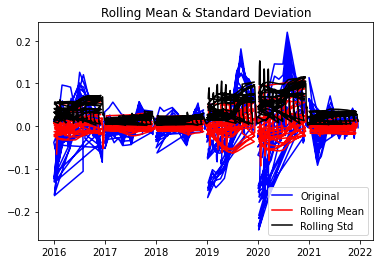

Results of Dickey-Fuller Test:
Test Statistic                -1.493607e+01
p-value                        1.344003e-27
#Lags Used                     2.600000e+01
Number of Observations Used    2.144000e+03
Critical Value (1%)           -3.433404e+00
Critical Value (5%)           -2.862889e+00
Critical Value (10%)          -2.567488e+00
dtype: float64


In [22]:
test_stationarity(ts_log_moving_avg_diff)

By looking at the data we can say, This is not stationary because :

• mean is increasing even though the std is small.

• Test stat is > critical value.


### Trend
The first step is to reduce the trend using transformation, as we can see here that there is a strong positive trend. These transformation can be log, sq-rt, cube root etc


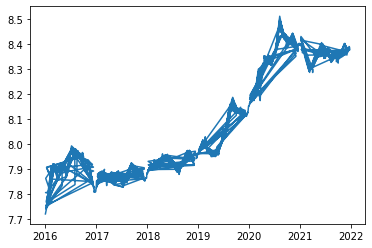

In [23]:
ts_log = np.log(ts)
plt.plot(ts_log)
plt.show()

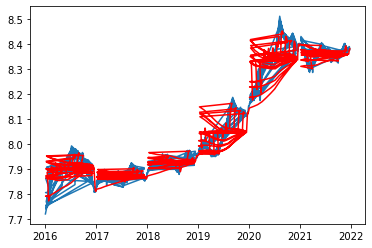

In [24]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

### Now subtract the rolling mean from the original series.


In [25]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head()

date
2016-01-01   NaN
2016-02-01   NaN
2016-03-01   NaN
2016-04-01   NaN
2016-05-01   NaN
Name: price, dtype: float64

In [26]:
ts_log_moving_avg_diff.dropna(inplace=True)
ts_log_moving_avg_diff.head()

date
2016-12-01   -0.039877
2016-01-13   -0.130325
2016-01-14   -0.127601
2016-01-15   -0.101950
2016-01-16   -0.094308
Name: price, dtype: float64

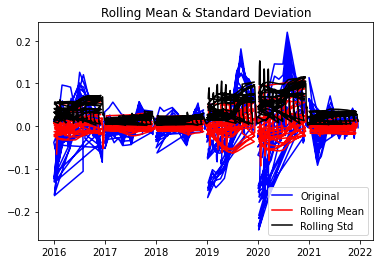

Results of Dickey-Fuller Test:
Test Statistic                -1.493607e+01
p-value                        1.344003e-27
#Lags Used                     2.600000e+01
Number of Observations Used    2.144000e+03
Critical Value (1%)           -3.433404e+00
Critical Value (5%)           -2.862889e+00
Critical Value (10%)          -2.567488e+00
dtype: float64


In [27]:
test_stationarity(ts_log_moving_avg_diff)

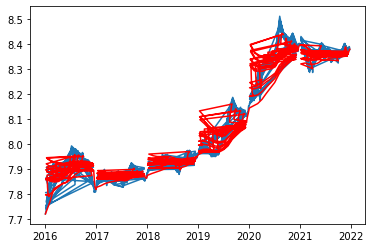

In [28]:
# expweighted_avg = pd.ewma(ts_log, halflife=12)
expweighted_avg = ts_log.ewm(span=12).mean()
plt.plot(ts_log)
plt.plot(expweighted_avg, color='red')
plt.show()

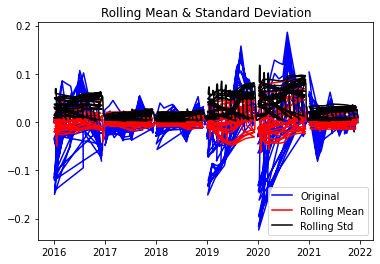

Results of Dickey-Fuller Test:
Test Statistic                -1.498971e+01
p-value                        1.130077e-27
#Lags Used                     2.600000e+01
Number of Observations Used    2.155000e+03
Critical Value (1%)           -3.433388e+00
Critical Value (5%)           -2.862882e+00
Critical Value (10%)          -2.567484e+00
dtype: float64


In [29]:
ts_log_ewma_diff = ts_log - expweighted_avg
test_stationarity(ts_log_ewma_diff)

### Seasonality (along with Trend)

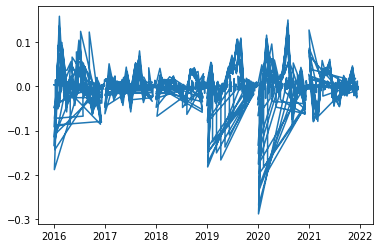

In [30]:
# take first difference 
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
plt.show()

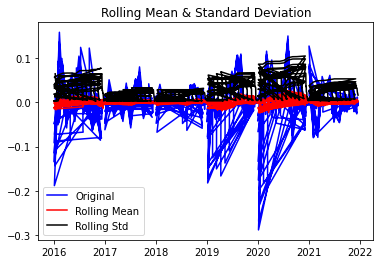

Results of Dickey-Fuller Test:
Test Statistic                  -21.394232
p-value                           0.000000
#Lags Used                       26.000000
Number of Observations Used    2154.000000
Critical Value (1%)              -3.433390
Critical Value (5%)              -2.862883
Critical Value (10%)             -2.567485
dtype: float64


In [31]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

### Decomposing:
Here we model both the trend and the seasonality, then the remaining part of the time series is returned.

In [33]:
ts_log

date
2016-01-01    7.719840
2016-02-01    7.805678
2016-03-01    7.904003
2016-04-01    7.854692
2016-05-01    7.862401
                ...   
2021-12-17    8.388086
2021-12-18    8.386971
2021-12-19    8.386971
2021-12-20    8.378873
2021-12-21    8.377126
Name: price, Length: 2182, dtype: float64

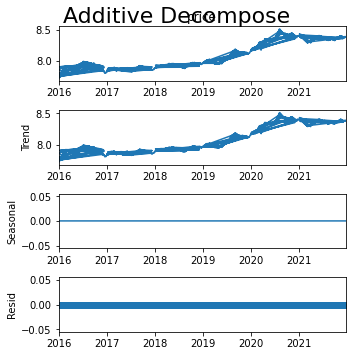

In [36]:
result_add = seasonal_decompose(x=ts_log, model='additive', extrapolate_trend='freq', period=1)
plt.rcParams.update({'figure.figsize': (5,5)})
result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

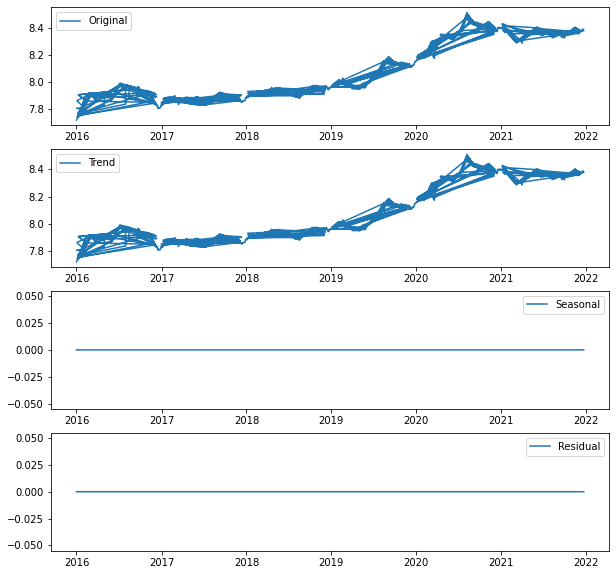

In [38]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(x=ts_log, model='additive', extrapolate_trend='freq', period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 10))

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')

plt.show()

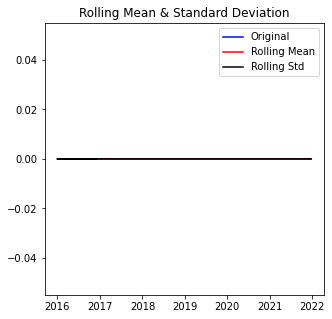

Results of Dickey-Fuller Test:
Test Statistic                         NaN
p-value                                NaN
#Lags Used                        0.000000
Number of Observations Used    2181.000000
Critical Value (1%)              -3.433352
Critical Value (5%)              -2.862866
Critical Value (10%)             -2.567476
dtype: float64


C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:903: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2


In [39]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:662: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


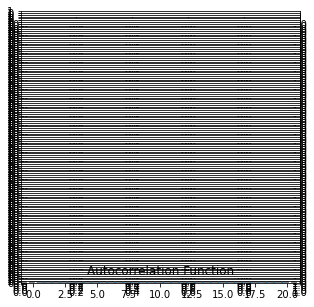

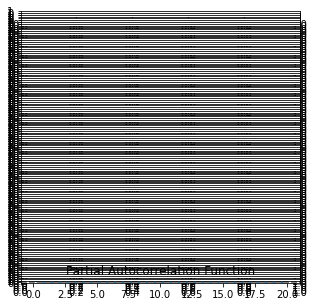

In [40]:
from statsmodels.tsa.arima_model import ARIMA
# ACF and PACF plots ;
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

# plot ACF :
plt.subplots(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')

# plot PACF :
plt.subplots(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
#plt.tight_layout()
plt.show()

## AR MODEL

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

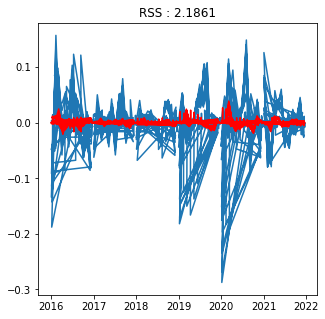

In [41]:
model = ARIMA(ts_log, order=(2, 1, 0))
result_AR = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(result_AR.fittedvalues, color='red')
plt.title('RSS : %0.4f'% sum((result_AR.fittedvalues - ts_log_diff)**2))
plt.show()

## MA MODEL¶

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency

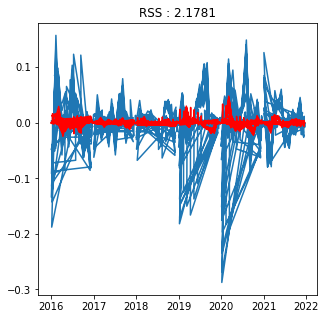

In [42]:
model = ARIMA(ts_log, order=(0, 1, 2))
result_MA = model.fit(disp=-1)
plt.plot(ts_log_diff)
plt.plot(result_MA.fittedvalues, color='red')
plt.title('RSS : %0.4f'% sum((result_MA.fittedvalues - ts_log_diff)**2))
plt.show()

## ARIMA MODEL

C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\nikhi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be i

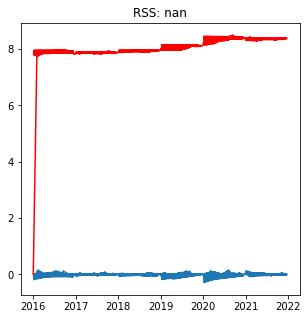

In [43]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(ts_log, order=(2, 1, 2))
results_ARIMA = model.fit()
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %0.4f'%sum(results_ARIMA.fittedvalues-ts_log_diff)**2)
plt.show()

In [44]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

date
2016-01-01    0.000000
2016-02-01    7.719840
2016-03-01    7.804227
2016-04-01    7.887741
2016-05-01    7.833534
dtype: float64

In [45]:
#predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum = np.cumsum(predictions_ARIMA_diff)

predictions_ARIMA_diff_cumsum.head()

date
2016-01-01     0.000000
2016-02-01     7.719840
2016-03-01    15.524068
2016-04-01    23.411808
2016-05-01    31.245342
dtype: float64

In [46]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

date
2016-01-01     7.719840
2016-02-01    15.439681
2016-03-01    23.243908
2016-04-01    31.131649
2016-05-01    38.965183
dtype: float64